In [98]:
import geopandas as gpd
from pyproj import CRS
import matplotlib.pyplot as plt
import pandas as pd

# Filepaths
grid_fp = r'data/MetropAccess_YKR_grid_EurefFIN.shp'
roads_fp =r'data/roads.shp'

# Read files
grid = gpd.read_file(grid_fp)
roads = gpd.read_file(roads_fp)

In [99]:
data_fp = r'TravelTimes_to_5878070_Jumbo.txt'
data_Jumbo = pd.read_csv(data_fp,delimiter=';',na_values=-1)
data_Jumbo = data_Jumbo.dropna()
data_geo = grid.merge(data_Jumbo, left_on='YKR_ID',right_on='from_id')

In [100]:
roads = roads.to_crs(epsg=3857)
data_geo = data_geo.to_crs(epsg=3857)

In [101]:
def diff(row):
    diff = row['car_r_t']-row['car_m_t']          #Rush hour traffic time - midday traffic time
    return diff
data_geo['DIFF'] = data_geo.apply(diff,axis=1)

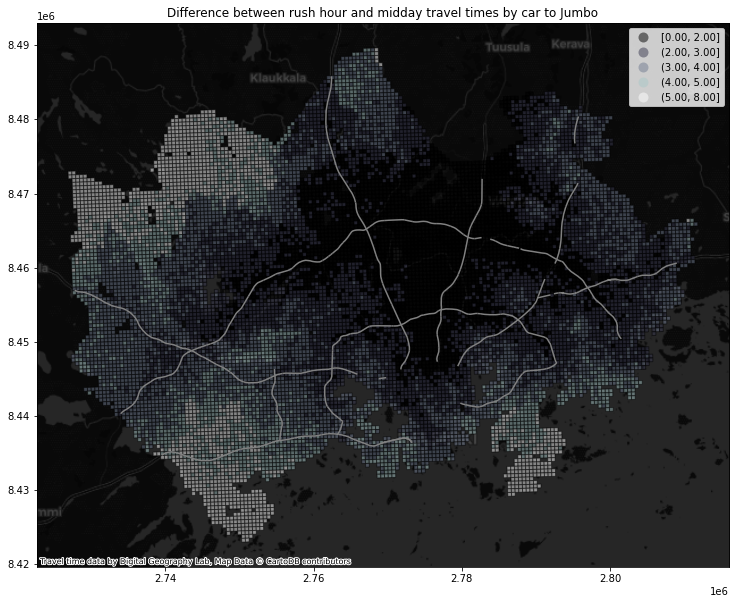

In [135]:
import contextily as ctx
fig,ax = plt.subplots(figsize=(15,10))
data_geo.plot(ax=ax,
              column='DIFF',
             legend=True,
              alpha = 0.5,
              scheme='quantiles',
              k=5,
              cmap='bone',
              edgecolor='k',
             )
roads.plot(ax=ax, color='Grey')

ax.set_title('Difference between rush hour and midday travel times by car to Jumbo')
credits = "Travel time data by Digital Geography Lab, Map Data © CartoDB contributors"
ctx.add_basemap(ax,
               source=ctx.providers.CartoDB.DarkMatter,
               attribution=credits,
               zoom=10)
plt.savefig('Jumbo_travel_time_difference.png',dpi=200)

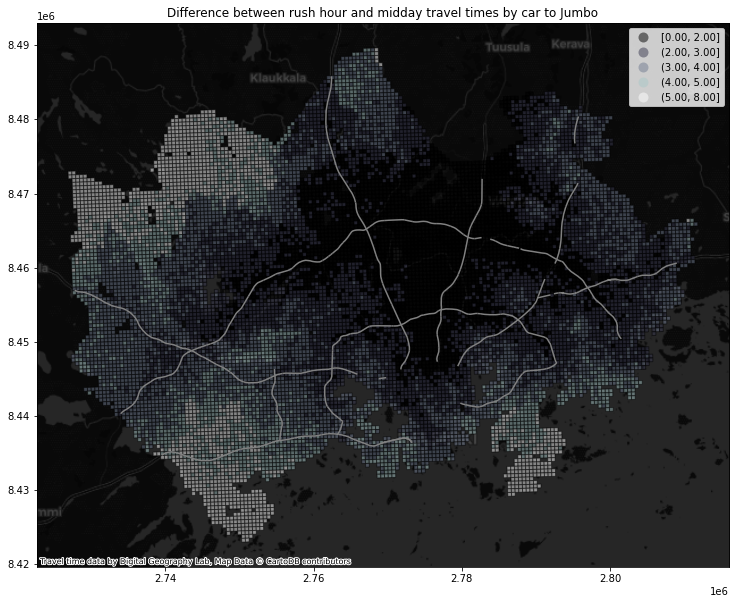